In [1]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c5dc31db68977ab3e00538d89722efc24cd45c06e5803bcc1328f9c7a6258c56
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [2]:
!pip install mlforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.1 MB/s eta 0:00:00


# Analyze traffic dataset ✈

Use fbprophet, nixtla ml forecast and nixtla neural forecaster.

In [3]:
import pandas as pd

from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport # from April, 1st 2023

<ipython-input-3-32c635d96f32>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
traffic_df = pd.read_parquet('traffic_10lines.parquet')

In [6]:
traffic_df.describe(include='all').transpose()

<ipython-input-6-7d983b1c6b81>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()
<ipython-input-6-7d983b1c6b81>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,254899,2626,2019-01-02 00:00:00,165,2016-01-01 00:00:00,2023-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pax,254899.0,NaN,NaN,NaN,NaN,NaN,127.082676,53.050019,-11.0,88.0,140.0,168.0,582.0
seats,250749.0,NaN,NaN,NaN,NaN,NaN,159.352879,47.311964,0.0,144.0,174.0,186.0,615.0
flight_type,251168,19,J,240627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight_typename,254899,4,Scheduled,251250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_airport,254899,8,LIS,125254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paired_airport,254899,10,OPO,72331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_airportname,254899,8,Lisbon,125254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paired_airportname,254899,10,Porto,72331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,254899.0,<NA>,<NA>,<NA>,<NA>,<NA>,944.365078,886.540144,277.0,277.0,1109.0,1437.0,11653.0


In [ ]:
profile_report = ProfileReport(traffic_df)

In [ ]:
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
traffic_df

,date,pax,seats,flight_type,flight_typename,home_airport,paired_airport,home_airportname,paired_airportname,distance,...,airline_iata,airline_name,scheduled_datetime,direction,home_country,paired_country,home_countryname,paired_countryname,travel_area,aircraft_type
3223247,2018-08-04,155.0,156.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2018-08-04 12:15:00,A,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223311,2017-05-03,132.0,144.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,BA,British Airways,2017-05-03 11:20:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223347,2022-08-05,136.0,156.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2022-08-05 21:55:00,A,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223366,2019-10-16,170.0,180.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,EC,EasyJet,2019-10-16 09:10:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,320
3223425,2019-01-26,166.0,180.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2019-01-26 06:55:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977453,2022-04-19,72.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2022-04-19 07:25:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,789
9977758,2020-03-22,162.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2020-03-22 16:45:00,D,CL,GB,Chile,United Kingdom,International Long-Haul,789
9977808,2021-12-23,164.0,313.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2021-12-23 10:04:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,789
9995284,2019-04-06,161.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2019-04-06 08:35:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,Boeing 787-900


In [ ]:
(traffic_df
 .groupby(['home_airport', 'paired_airport', 'direction'])
 .agg(date_min=('date', 'min'), date_max=('date', 'max'), pax=('pax', 'sum'))
 .reset_index()
)

,home_airport,paired_airport,direction,date_min,date_max,pax
0,LGW,AMS,A,2016-01-01,2023-03-09,2686346.0
1,LGW,AMS,D,2016-01-01,2023-03-09,2686476.0
2,LGW,BCN,A,2016-01-01,2023-03-10,3813240.0
3,LGW,BCN,D,2016-01-01,2023-03-09,3799836.0
4,LIS,OPO,A,2016-01-01,2023-03-09,2819094.0
5,LIS,OPO,D,2016-01-01,2023-03-09,2813651.0
6,LIS,ORY,A,2016-01-01,2023-03-09,3835664.0
7,LIS,ORY,D,2016-01-01,2023-03-09,3860404.0
8,LYS,PIS,A,2017-11-20,2023-03-09,6173.0
9,LYS,PIS,D,2018-01-02,2023-03-09,4178.0


## Visualization

In [ ]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 ['airline_name']
 .value_counts()
)

Volotea                362
Smartwings             140
Transavia               98
Enter Air               81
ASL Airlines France      1
Ryanair                  1
Name: airline_name, dtype: int64

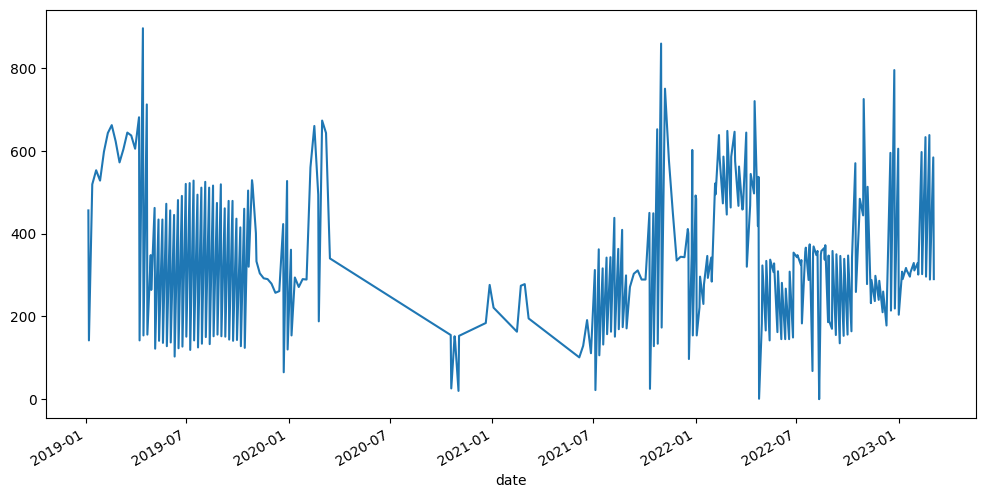

In [ ]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [ ]:
# Si vous êtes sous Jupyter
%matplotlib inline

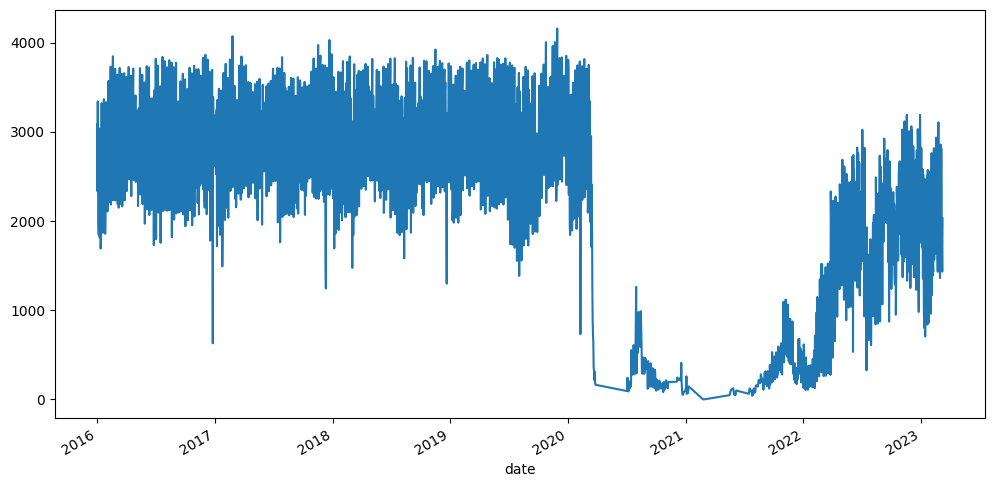

In [ ]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [ ]:
import seaborn as sns

sns.set()

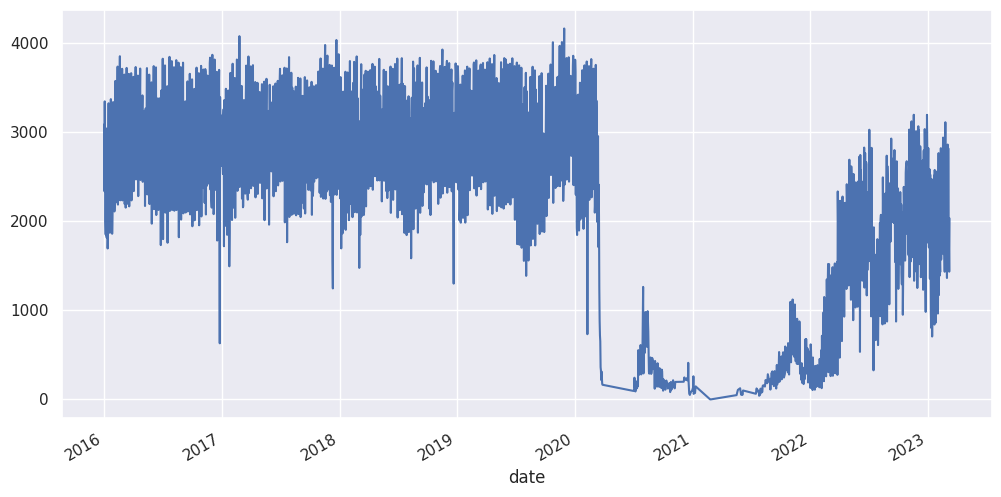

In [ ]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [ ]:
import datetime
import plotly

import plotly.offline as pyoff
import plotly.graph_objs as go

from plotly.subplots import make_subplots


def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False, display=True):
  """Draw times series possibly on two y axis, with COVID period option.

  Args:
  - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
  - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
  - v2 (str): name of the serie to plot on the second y axis (default: None)
  - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
  - date (str): name of date column for time (default: 'date')
  - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
  - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
  - display (bool): display figure otherwise just return the figure (default: True)

  Returns:
  - fig (plotly.graph_objs._figure.Figure): Plotly figure generated

  Notes:
  Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
  Or use `display=False`.
  """
  if isinstance(v1, str):
    variables = [(v1, 'V1')]
  else:
    variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
  title = '<br>'.join([n + ': '+ v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join([v + ': '+ n for v, n in variables])
  layout = dict(
    title=title,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
  )
  fig = make_subplots(specs=[[{"secondary_y": True}]])
  fig.update_layout(layout)
  for v, name in variables:
    fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
  if v2:
    fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
    fig['layout']['yaxis2']['showgrid'] = False
    fig.update_yaxes(rangemode='tozero')
    fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
  if prediction:
    fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

  if covid_zone:
    fig.add_vrect(
        x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
        fillcolor="Gray", opacity=0.5,
        layer="below", line_width=0,
    )
  if display:
    pyoff.iplot(fig)
  return fig

In [ ]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
)

ajout affciher les données d'une route


In [ ]:
import plotly.graph_objects as go

# Filter the data for the specific route
filtered_data = traffic_df.query('home_airport == "NTE" and paired_airport == "FUE"')

# Group the data by date and calculate the total passenger count
grouped_data = filtered_data.groupby(['home_airport', 'paired_airport', 'date']).agg(
    pax_total=('pax', 'sum')
).reset_index()

# Create the Plotly graph
fig = go.Figure(data=go.Scatter(x=grouped_data['date'], y=grouped_data['pax_total'], mode='lines'))
fig.update_layout(title='Passenger Traffic on Route', xaxis_title='Date', yaxis_title='Passenger Count')

# Display the graph
fig.show()


In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd
import plotly.offline as pyoff

def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False):
    fig = sp.make_subplots(specs=[[{"secondary_y": secondary_y}]])
    fig.update_layout(
        title=f"Time Series Analysis",
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(visible=True),
            type='date'
        )
    )
    fig.update_yaxes(title_text="Primary Y-axis", secondary_y=False)
    if v2:
        fig.update_yaxes(title_text="Secondary Y-axis", secondary_y=True)
    
    fig.add_trace(go.Scatter(x=df[date], y=df[v1], name="V1"), secondary_y=False)
    
    if v2:
        fig.add_trace(go.Scatter(x=df[date], y=df[v2], name="V2"), secondary_y=True)
    
    if prediction:
        fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name="Prediction", line=dict(dash='dot')), secondary_y=False)
    
    if covid_zone:
        fig.add_vrect(
            x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
            fillcolor="Gray", opacity=0.5,
            layer="below", line_width=0
        )
    
    pyoff.plot(fig)


In [ ]:
draw_ts_multiple(df, 'v1', 'v2', 'prediction', 'date', True, True)


NameError: ignored

In [ ]:
import pandas as pd
import numpy as np

# Création d'un DataFrame fictif
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
v1_data = np.random.rand(len(dates))
v2_data = np.random.rand(len(dates))
prediction_data = np.random.rand(len(dates))

df = pd.DataFrame({'date': dates, 'v1': v1_data, 'v2': v2_data, 'prediction': prediction_data})


In [ ]:
draw_ts_multiple(df, 'v1', 'v2', 'prediction', 'date', True, True)


In [ ]:
import datetime
import plotly

import plotly.offline as pyoff
import plotly.graph_objs as go

from plotly.subplots import make_subplots


def draw_ts_multiple(df, v1, v2=None, prediction=None, date='date',
                     secondary_y=True, covid_zone=False, display=True):
    """Draw times series possibly on two y axis, with COVID period option.
  
    Args:
    - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
    - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
    - v2 (str): name of the serie to plot on the second y axis (default: None)
    - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
    - date (str): name of date column for time (default: 'date')
    - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
    - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
    - display (bool): display figure otherwise just return the figure (default: True)
  
    Returns:
    - fig (plotly.graph_objs._figure.Figure): Plotly figure generated
  
    Notes:
    Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
    Or use `display=False`.
    """
    if isinstance(v1, str):
        variables = [(v1, 'V1')]
    else:
        variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
    title = '<br>'.join([n + ': '+ v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join([v + ': '+ n for v, n in variables])
    layout = dict(
        title=title,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type='date'
        )
    )
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.update_layout(layout)
    for v, name in variables:
        fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
    if v2:
        fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
        fig['layout']['yaxis2']['showgrid'] = False
        fig.update_yaxes(rangemode='tozero')
        fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
    if prediction:
        fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

    if covid_zone:
        fig.add_vrect(
            x0=datetime.datetime(2020, 3, 1), x1=datetime.datetime(2022, 1, 1),
            fillcolor="Gray", opacity=0.5,
            layer="below", line_width=0,
        )
    if display:
        pyoff.iplot(fig)
    return fig

# Utilisation du code pour afficher les données de la route LGW-AMS
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
)


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff

def plot_route_data(df, home_airport, paired_airport):
    route_df = df[(df['home_airport'] == home_airport) & (df['paired_airport'] == paired_airport)]
    fig = go.Figure(data=go.Scatter(x=route_df['date'], y=route_df['pax'], mode='lines'))
    fig.update_layout(title=f"Route {home_airport} - {paired_airport}",
                      xaxis_title='Date',
                      yaxis_title='Passenger Count')
    pyoff.iplot(fig)

# Utilisation du code pour afficher les données de la route NTE-FUE
plot_route_data(traffic_df, 'NTE', 'FUE')


In [ ]:
import plotly.graph_objects as go

# Création de la trace de vol
flight_trace = go.Scattergeo(
    mode = "lines",
    lon = df['homeAirport'],      # Colonne contenant les longitudes de départ des vols
    lat = df['pairedAirport'],    # Colonne contenant les latitudes de départ des vols
    hoverinfo = 'text',
    text = df['flight_number'],   # Colonne contenant les numéros de vol
    line = dict(width = 1, color = 'blue'),
)

# Création de la carte
layout = go.Layout(
    title_text = "Itinéraire des vols",
    showlegend = False,
    geo = dict(
        resolution = 110,
        showland = True,
        showlakes = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
        lakecolor = 'rgb(255, 255, 255)',
        projection_type = "equirectangular",
        coastlinewidth = 2,
        lataxis = dict(
            range = [df['pairedAirport'].min()-2, df['pairedAirport'].max()+2],
            showgrid = True,
            dtick = 10
        ),
        lonaxis = dict(
            range = [df['homeAirport'].min()-2, df['homeAirport'].max()+2],
            showgrid = True,
            dtick = 20
        )
    )
)

# Création de la figure
fig = go.Figure(data=flight_trace, layout=layout)
fig.show()


KeyError: ignored

In [ ]:
nte_fue_df = (traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
)
nte_fue_df

,home_airport,paired_airport,date,pax_total
0,NTE,FUE,2019-01-06,456.0
1,NTE,FUE,2019-01-07,142.0
2,NTE,FUE,2019-01-13,519.0
3,NTE,FUE,2019-01-20,553.0
4,NTE,FUE,2019-01-27,528.0
...,...,...,...,...
288,NTE,FUE,2023-02-19,296.0
289,NTE,FUE,2023-02-25,638.0
290,NTE,FUE,2023-02-26,289.0
291,NTE,FUE,2023-03-04,584.0


In [ ]:
lgw_ams_df = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
)
lgw_ams_df

,home_airport,paired_airport,date,pax_total
0,LGW,AMS,2016-01-01,3081.0
1,LGW,AMS,2016-01-02,2334.0
2,LGW,AMS,2016-01-03,3341.0
3,LGW,AMS,2016-01-04,2665.0
4,LGW,AMS,2016-01-05,1996.0
...,...,...,...,...
2243,LGW,AMS,2023-03-05,2815.0
2244,LGW,AMS,2023-03-06,1916.0
2245,LGW,AMS,2023-03-07,1741.0
2246,LGW,AMS,2023-03-08,1432.0


## First model with Facebook

In [27]:
def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
  """Extract route dataframe from traffic dataframe for route from home airport to paired airport

  Args:
  - traffic_df (pd.DataFrame): traffic dataframe
  - homeAirport (str): IATA Code for home airport
  - pairedAirport (str): IATA Code for paired airport

  Returns:
  - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
  """
  _df = (traffic_df
         .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home=homeAirport, paired=pairedAirport))
         .groupby(['home_airport', 'paired_airport', 'date'])
         .agg(pax_total=('pax', 'sum'))
         .reset_index()
         )
  return _df

In [28]:
generate_route_df(traffic_df, "LGW", "AMS")

,home_airport,paired_airport,date,pax_total
0,LGW,AMS,2016-01-01,3081.0
1,LGW,AMS,2016-01-02,2334.0
2,LGW,AMS,2016-01-03,3341.0
3,LGW,AMS,2016-01-04,2665.0
4,LGW,AMS,2016-01-05,1996.0
...,...,...,...,...
2243,LGW,AMS,2023-03-05,2815.0
2244,LGW,AMS,2023-03-06,1916.0
2245,LGW,AMS,2023-03-07,1741.0
2246,LGW,AMS,2023-03-08,1432.0


In [ ]:
from prophet import Prophet

In [ ]:
baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df, "NTE", "FUE").rename(columns={'date': 'ds', 'pax_total': 'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp072kdxcs/id0fr39p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp072kdxcs/7br7s0t_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84438', 'data', 'file=/tmp/tmp072kdxcs/id0fr39p.json', 'init=/tmp/tmp072kdxcs/7br7s0t_.json', 'output', 'file=/tmp/tmp072kdxcs/prophet_modelp81piyta/prophet_model-20230317082947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:29:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_df = baseline_model.make_future_dataframe(periods=15) # Prepare to predict 15 days
future_df

,ds
0,2019-01-06
1,2019-01-07
2,2019-01-13
3,2019-01-20
4,2019-01-27
...,...
303,2023-03-16
304,2023-03-17
305,2023-03-18
306,2023-03-19


In [ ]:
forecast_df = baseline_model.predict(future_df)

In [ ]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,366.987264,328.816236,621.080142,366.987264,366.987264,113.963365,113.963365,113.963365,136.806409,136.806409,136.806409,-22.843043,-22.843043,-22.843043,0.0,0.0,0.0,480.950629
1,2019-01-07,366.754933,66.297065,360.021931,366.754933,366.754933,-148.140453,-148.140453,-148.140453,-115.899406,-115.899406,-115.899406,-32.241047,-32.241047,-32.241047,0.0,0.0,0.0,218.614479
2,2019-01-13,365.360946,273.647219,562.776137,365.360946,365.360946,56.838713,56.838713,56.838713,136.806409,136.806409,136.806409,-79.967696,-79.967696,-79.967696,0.0,0.0,0.0,422.199658
3,2019-01-20,363.734627,260.748155,563.858155,363.734627,363.734627,49.792236,49.792236,49.792236,136.806409,136.806409,136.806409,-87.014173,-87.014173,-87.014173,0.0,0.0,0.0,413.526863
4,2019-01-27,362.108309,310.177995,625.793330,362.108309,362.108309,103.916880,103.916880,103.916880,136.806409,136.806409,136.806409,-32.889528,-32.889528,-32.889528,0.0,0.0,0.0,466.025189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2023-03-16,250.086252,-37.790003,266.420678,250.086252,250.086252,-132.497205,-132.497205,-132.497205,-256.348557,-256.348557,-256.348557,123.851352,123.851352,123.851352,0.0,0.0,0.0,117.589047
304,2023-03-17,250.129075,276.205680,568.882259,250.129075,250.129075,168.375159,168.375159,168.375159,44.060402,44.060402,44.060402,124.314757,124.314757,124.314757,0.0,0.0,0.0,418.504234
305,2023-03-18,250.171898,335.999947,628.635787,250.171898,250.172765,227.954512,227.954512,227.954512,103.260604,103.260604,103.260604,124.693908,124.693908,124.693908,0.0,0.0,0.0,478.126410
306,2023-03-19,250.214721,366.834569,652.811716,250.214721,250.220056,261.821769,261.821769,261.821769,136.806409,136.806409,136.806409,125.015360,125.015360,125.015360,0.0,0.0,0.0,512.036491


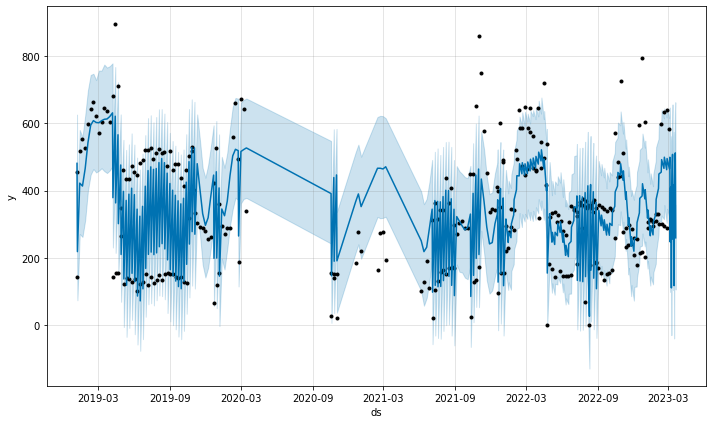

In [ ]:
graph = baseline_model.plot(forecast_df)

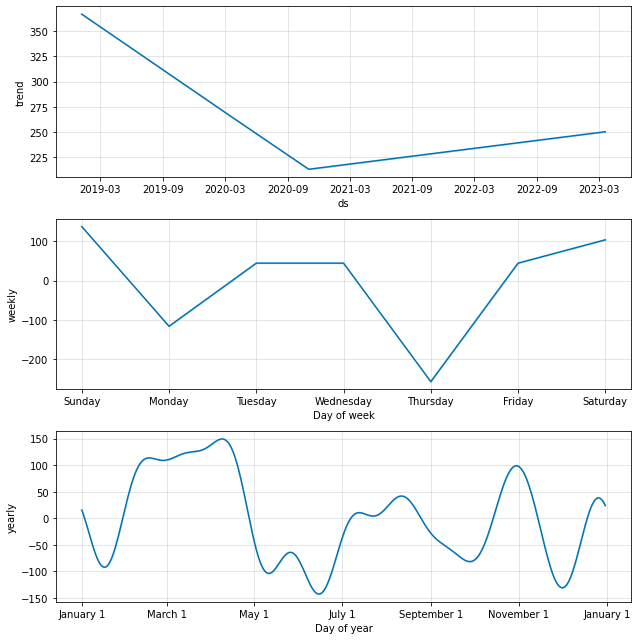

In [ ]:
baseline_model.plot_components(forecast_df);

### Evaluate performance

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
eval_df = cross_validation(baseline_model, initial='366 days', period='90 days', horizon='90 days')

In [ ]:
eval_df

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-10-18,447.472952,351.130605,536.210872,155.0,2020-09-16
1,2020-10-19,124.280990,30.798872,227.855594,26.0,2020-09-16
2,2020-10-25,488.585274,396.897876,579.833302,152.0,2020-09-16
3,2020-10-26,153.801841,60.074970,243.247618,139.0,2020-09-16
4,2020-11-01,439.584883,351.114339,528.711255,20.0,2020-09-16
...,...,...,...,...,...,...
189,2023-02-19,562.993455,426.134241,705.002565,296.0,2022-12-05
190,2023-02-25,465.255019,320.994503,607.791389,638.0,2022-12-05
191,2023-02-26,553.509927,407.511306,691.245757,289.0,2022-12-05
192,2023-03-04,465.385062,334.628859,599.462181,584.0,2022-12-05


In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
performance_metrics(eval_df)

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,10 days,7964.572025,89.244451,72.291339,0.209460,0.282279,0.736842
1,11 days,9346.762087,96.678654,78.280908,0.227023,0.317436,0.710526
2,12 days,12625.430698,112.362942,86.326633,0.209460,0.325730,0.684211
3,13 days,13687.832616,116.995011,90.400662,0.229651,0.334530,0.657895
4,14 days,12874.968302,113.467918,85.317102,0.192882,0.318882,0.684211
...,...,...,...,...,...,...,...
76,86 days,35044.098263,187.200690,154.016154,0.566636,0.616390,0.403509
77,87 days,31087.535293,176.316577,150.802874,0.497562,0.555897,0.368421
78,88 days,28591.350991,169.089772,142.621852,0.445899,0.528505,0.368421
79,89 days,24919.942869,157.860517,131.487817,0.388496,0.490253,0.473684


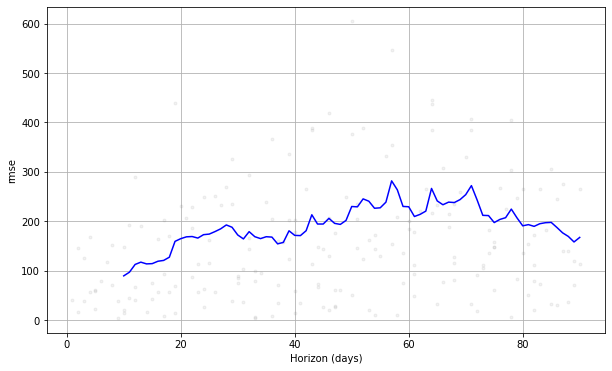

In [ ]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(eval_df, metric='rmse');

### Automate model fitting and evaluation

In [ ]:
routes = (traffic_df
 .drop_duplicates(subset=['home_airport', 'paired_airport'])
 [['home_airport', 'paired_airport']]
 .to_dict(orient='rows')
)

In [ ]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
#logging.getLogger('prophet').setLevel(logging.WARNING)

In [ ]:
models = dict()
performances = dict()

for route in routes:
  print(route)
  home = route['home_airport']
  paired = route['paired_airport']
  # Build route traffic dataframe
  _df = generate_route_df(traffic_df, home, paired)
  # Create a model
  _model = Prophet()
  # Fit the model
  _model.fit(_df.rename(columns={'date': 'ds', 'pax_total': 'y'}))
  # Cross validate the model
  _cv_df = cross_validation(_model, horizon='90 days', parallel="processes")
  _perf_df = performance_metrics(_cv_df, rolling_window=1)
  # Save results
  models[(route['home_airport'], route['paired_airport'])] = _model
  performances[(route['home_airport'], route['paired_airport'])] = _perf_df['rmse'].values[0]
  

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'BCN'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-10 00:00:00 and 2022-12-10 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa51e7f10>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'AMS'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aab0072e0>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'ORY'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa5c377c0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'OPO'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa5c17190>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'SSA', 'paired_airport': 'GRU'}


INFO:prophet:Making 24 forecasts with cutoffs between 2020-02-08 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa5c4b250>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'NTE', 'paired_airport': 'FUE'}


INFO:prophet:Making 20 forecasts with cutoffs between 2020-08-02 00:00:00 and 2022-12-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa51a6ac0>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 26 forecasts with cutoffs between 2018-11-24 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa5c51b80>


{'home_airport': 'LYS', 'paired_airport': 'PIS'}


INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints g

{'home_airport': 'PNH', 'paired_airport': 'NGB'}


INFO:prophet:Making 11 forecasts with cutoffs between 2017-10-02 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa5d262b0>
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'POP', 'paired_airport': 'JFK'}


INFO:prophet:Making 32 forecasts with cutoffs between 2019-02-13 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa5dfff70>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 13 forecasts with cutoffs between 2020-01-04 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8aa5c024f0>


{'home_airport': 'SCL', 'paired_airport': 'LHR'}


In [ ]:
models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f8aab2f3370>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f8aab8ccd30>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f8aab0178e0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f8aab578430>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f8aa5136640>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f8aa5b722b0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f8aa5b77a30>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f8abcf78940>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f8aa5c14670>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f8aa5b9c3d0>}

In [ ]:
performances

{('LGW', 'BCN'): 1252.80455530257,
 ('LGW', 'AMS'): 927.4295007587415,
 ('LIS', 'ORY'): 871.9787557259463,
 ('LIS', 'OPO'): 607.0948037131809,
 ('SSA', 'GRU'): 1952.9757983596164,
 ('NTE', 'FUE'): 192.23652122836083,
 ('LYS', 'PIS'): 632.5392618552802,
 ('PNH', 'NGB'): 1562.754400403463,
 ('POP', 'JFK'): 76.63391104712609,
 ('SCL', 'LHR'): 146.91799138474485}

### Save models

In [ ]:
from prophet.serialize import model_to_json, model_from_json

for model in models:
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=model[0], paired=model[1])
  with open(_filename, 'w') as f:
    f.write(model_to_json(models[model]))

In [ ]:
reload_models = dict()

In [ ]:
for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=route['home_airport'],
                                                                paired=route['paired_airport'])
  with open(_filename, 'r') as f:
    reload_models[(route['home_airport'], route['paired_airport'])] = model_from_json(f.read())

In [ ]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f8abf930b50>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f8aa5b97e20>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f8aa5e0e160>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f8aa4180e80>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f8aab435610>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f8aa4268730>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f8aa42682b0>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f8aa2d4be20>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f8aa3ea8520>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f8aa3ea8460>}

In [ ]:
from joblib import dump, load

for model in models:
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=model[0], paired=model[1])
  dump(models[model], _filename)

In [ ]:
reload_models = dict()

for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=route['home_airport'],
                                                                  paired=route['paired_airport'])
  reload_models[(route['home_airport'], route['paired_airport'])] = load(_filename)

In [ ]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f8aa29d8fd0>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f8aa2a361c0>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f8aa29d8af0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f8aa29eb070>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f8aa29d8ca0>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f8aa29303a0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f8aa28c2f10>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f8aa29300d0>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f8aa28d5580>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f8aa286cee0>}

## Model with Nixtla

# Nouvelle section

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from mlforecast import MLForecast
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]

@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14, 21, 28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)


In [ ]:
nixtla_model = fcst.fit(generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
                        id_col='home_airport', time_col='date', target_col='pax_total')

In [ ]:
predict_df = nixtla_model.predict(14)
predict_df

,home_airport,date,LGBMRegressor,XGBRegressor,RandomForestRegressor
0,LGW,2023-03-10,2522.142311,2416.332520,2447.83
1,LGW,2023-03-11,1375.064901,1125.572388,1219.15
2,LGW,2023-03-12,2385.056909,1795.271851,2252.45
3,LGW,2023-03-13,1667.920360,1334.042480,1824.71
4,LGW,2023-03-14,1650.751786,1582.571167,1633.86
5,LGW,2023-03-15,1418.832738,1090.876709,1259.96
6,LGW,2023-03-16,2099.141695,1895.774170,2080.54
7,LGW,2023-03-17,2409.705368,2147.150146,2365.46
8,LGW,2023-03-18,1465.166364,1006.790649,1080.81
9,LGW,2023-03-19,2544.719226,1646.215820,2135.46


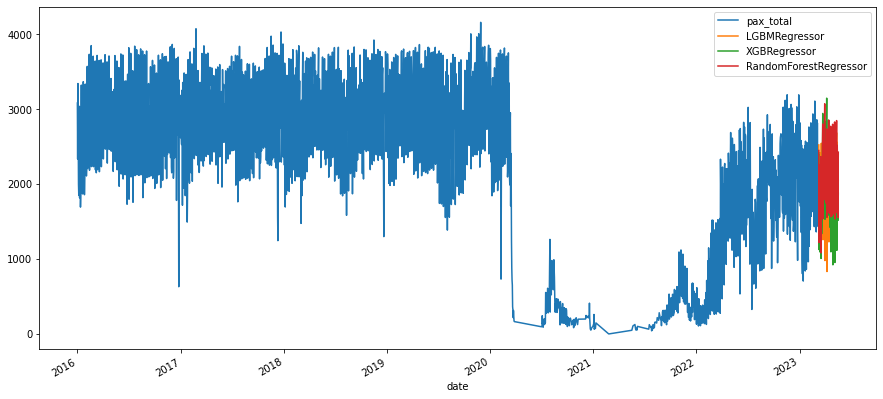

In [ ]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [ ]:
draw_ts_multiple((pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
                             nixtla_model.predict(7*10)])),
                 v1='pax_total', v2='LGBMRegressor');

In [ ]:
crossvalidation_df = fcst.cross_validation(
    data=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    window_size=90,
    n_windows=5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)

In [ ]:
crossvalidation_df

,home_airport,date,cutoff,pax_total,LGBMRegressor,XGBRegressor,RandomForestRegressor
0,LGW,2021-12-15,2021-12-14,229.0,348.645547,281.325165,267.72
1,LGW,2021-12-16,2021-12-14,429.0,593.762678,508.705139,428.76
2,LGW,2021-12-17,2021-12-14,676.0,670.195026,623.942871,445.82
3,LGW,2021-12-18,2021-12-14,286.0,409.170319,532.024414,339.56
4,LGW,2021-12-19,2021-12-14,676.0,803.159270,850.288818,678.39
...,...,...,...,...,...,...,...
445,LGW,2023-03-05,2022-12-09,2815.0,1865.829097,2310.340332,1553.94
446,LGW,2023-03-06,2022-12-09,1916.0,2222.291755,2665.737549,1668.80
447,LGW,2023-03-07,2022-12-09,1741.0,2131.488022,1903.722290,1928.02
448,LGW,2023-03-08,2022-12-09,1432.0,2069.155381,1967.471924,2089.95


In [ ]:
import numpy as np

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.sqrt(mse(y, y_hat))

In [ ]:
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForest RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGBoost RMSE using cross-validation: ", cv_rmse)

cv_rmse = (crossvalidation_df
           .assign(Ensemble=lambda _df: _df[['LGBMRegressor', 'RandomForestRegressor', 'XGBRegressor']].mean(axis=1))
           .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())
print("Ensemble RMSE using cross-validation: ", cv_rmse)

LGBM RMSE using cross-validation:  1123.0405776208863
RandomForest RMSE using cross-validation:  1013.2061289311698
XGBoost RMSE using cross-validation:  1220.3735710301205
Ensemble RMSE using cross-validation:  1047.6225207933953


## Model avec Neural Forecast

In [ ]:
!pip install neuralforecast

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

In [ ]:
horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_epochs=50),
          NHITS(input_size=2 * horizon, h=horizon, max_epochs=50)]

In [ ]:
nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                      'date': 'ds',
                                                                                                      'pax_total': 'y'}))

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
nforecast.predict().reset_index()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

,unique_id,ds,NBEATS,NHITS
0,LGW,2023-03-10,2265.771729,2221.245361
1,LGW,2023-03-11,1099.371582,1087.281616
2,LGW,2023-03-12,1955.275635,1997.968506
3,LGW,2023-03-13,1979.947266,2145.859619
4,LGW,2023-03-14,1705.986816,1522.316406
...,...,...,...,...
85,LGW,2023-06-03,1152.167725,1228.784668
86,LGW,2023-06-04,1912.655151,1931.157471
87,LGW,2023-06-05,2048.486328,2121.950928
88,LGW,2023-06-06,1654.967651,1506.189331


In [26]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))

NameError: ignored

solène

In [ ]:
!pip install setuptools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan==2.19.1.1
!pip install numpy==1.20.0
!pip install pandas==1.2.0
!pip install convertdate==2.3.0
!pip install holidays==0.11.0
!pip install matplotlib==3.3.3
!pip install seaborn==0.11.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 47.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 81.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by 

In [ ]:
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached multidict-6.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (114 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached yarl-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (268 kB)
  Using cached frozenlist-1.3.3-cp

In [ ]:
!pip install fbprophet

from fbprophet import Prophet

# Filtrer les données pour la route spécifique
route_data = traffic_df.query('home_airport == "LGW" and paired_airport == "AMS"')

# Agréger les données par date
aggregated_data = route_data.groupby('date').sum()['pax_total'].reset_index()

# Renommer les colonnes pour Prophet
aggregated_data = aggregated_data.rename(columns={'date': 'ds', 'pax_total': 'y'})

# Entraîner le modèle Prophet
model = Prophet()
model.fit(aggregated_data)

# Générer des dates pour la prévision
future_dates = model.make_future_dataframe(periods=7)  # Prévision pour 7 jours supplémentaires

# Effectuer la prévision
forecast = model.predict(future_dates)

# Afficher la prévision
model.plot(forecast, xlabel='Date', ylabel='Pax Total')
model.plot_components(forecast)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached multidict-6.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (114 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached yarl-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (268 kB)
  Using cached frozenlist-1.3.3-cp

ModuleNotFoundError: ignored

Question2

In [ ]:
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached multidict-6.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (114 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached yarl-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (268 kB)
  Using cached frozenlist-1.3.3-cp

In [ ]:
!pip install --upgrade setuptools wheel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install --no-build-isolation fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached multidict-6.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (114 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached yarl-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (268 kB)
  Using cached frozenlist-1.3.3-cp

In [ ]:
!git clone https://github.com/facebook/prophet.git
%cd prophet
!pip install --no-build-isolation .


In [ ]:
from fbprophet import Prophet
import pandas as pd

# Charger les données spécifiques de la route
data = pd.read_csv('chemin_vers_vos_donnees.csv')

# Filtrer les données pour la route spécifique que vous souhaitez prévoir
route_data = data[(data['home_airport'] == 'NTE') & (data['paired_airport'] == 'FUE')]

# Préparation des données avec les colonnes "ds" (date) et "y" (variable cible)
prepared_data = route_data[['date', 'pax']].rename(columns={'date': 'ds', 'pax': 'y'})

# Créer une instance du modèle Prophet
model = Prophet()

# Entraîner le modèle sur les données
model.fit(prepared_data)

# Prévoir pour x jours
future_dates = model.make_future_dataframe(periods=7)  # Prévoir pour 7 jours à partir de la dernière date des données
forecast = model.predict(future_dates)

# Afficher les prévisions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))


ModuleNotFoundError: ignored

# questions 


##1.Affichage des données d’une route (homeAirport – pairedAirport) sous forme d’un
graphique Plotly



In [7]:
import pandas as pd

# Filtrer les données pour le trajet ORY - LIS
filtered_data = traffic_df.query('home_airport == "LIS" and paired_airport == "ORY"')

# Compter le nombre de vols par compagnie aérienne
airline_counts = filtered_data['airline_name'].value_counts()

print(airline_counts)


TAP                    31897
Transavia              12608
Vueling                 6093
Aigle Azur              2312
Air France                 4
Air Cara├»bes              3
Corsair                    2
Tyrol Air Ambulance        1
Gain Jet Aviation          1
Name: airline_name, dtype: int64


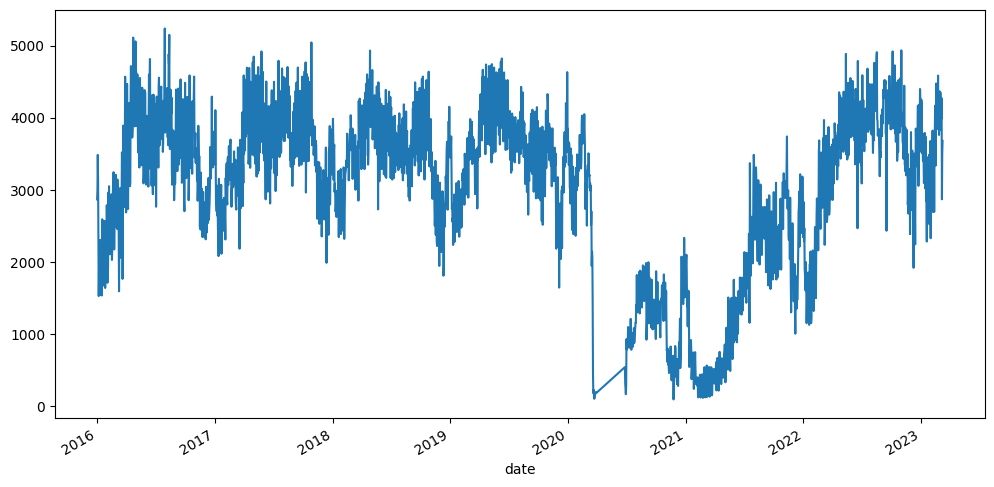

In [8]:
(traffic_df
 .query('home_airport == "LIS" and paired_airport == "ORY"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [9]:
import plotly.graph_objects as go

# Obtention des données de vol agrégées pour la route spécifiée
route_data = (traffic_df
              .groupby(['home_airport', 'paired_airport', 'direction'])
              .agg(date_min=('date', 'min'), date_max=('date', 'max'), pax=('pax', 'sum'))
              .reset_index())

# Filtrer les données pour la route LIS - ORY
filtered_data = route_data.query('home_airport == "LIS" and paired_airport == "ORY"')

# Création de la trace de vol
flight_trace = go.Scatter(
    x = filtered_data['direction'],
    y = filtered_data['pax'],
    mode = 'lines+markers',
    line = dict(color='blue'),
    marker = dict(symbol='circle', size=6, color='blue'),
    hovertemplate = 'Direction: %{x}<br>Pax: %{y}',
    name = 'Pax'
)

# Création de la mise en page du graphique
layout = go.Layout(
    title = 'Données de la route LIS - ORY',
    xaxis = dict(title='Direction'),
    yaxis = dict(title='Pax'),
    showlegend = False
)

# Création de la figure
fig = go.Figure(data=flight_trace, layout=layout)
fig.show()


In [10]:
import plotly.graph_objects as go

# Obtention des données de vol agrégées pour la route spécifiée
route_data = (traffic_df
              .groupby(['home_airport', 'paired_airport', 'direction'])
              .agg(date_min=('date', 'min'), date_max=('date', 'max'), pax=('pax', 'sum'))
              .reset_index())

# Création de la trace de vol
flight_trace = go.Scatter(
    x = route_data['direction'],
    y = route_data['pax'],
    mode = 'lines+markers',
    line = dict(color='blue'),
    marker = dict(symbol='circle', size=6, color='blue'),
    hovertemplate = 'Direction: %{x}<br>Pax: %{y}',
    name = 'Pax'
)

# Création de la mise en page du graphique
layout = go.Layout(
    title = 'Données de la route (homeAirport - pairedAirport)',
    xaxis = dict(title='Direction'),
    yaxis = dict(title='Pax'),
    showlegend = False
)

# Création de la figure
fig = go.Figure(data=flight_trace, layout=layout)
fig.show()

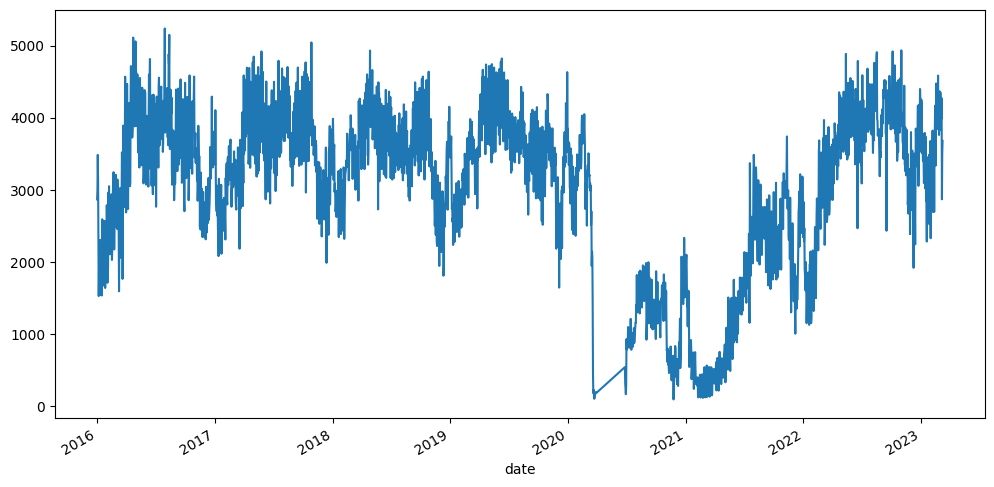

In [11]:
(traffic_df
 .query('home_airport == "LIS" and paired_airport == "ORY"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [12]:
import plotly.graph_objects as go
import pandas as pd

# Obtention des données agrégées pour la route spécifiée
route_data = (traffic_df
              .query('home_airport == "LIS" and paired_airport == "ORY"')
              .groupby(['home_airport', 'paired_airport', 'date'])
              .agg(pax_total=('pax', 'sum'))
              .reset_index()
              .set_index('date'))

# Création de la trace de vol
flight_trace = go.Scatter(
    x = route_data.index,
    y = route_data['pax_total'],
    mode = 'lines+markers',
    line = dict(color='blue'),
    marker = dict(symbol='circle', size=6, color='blue'),
    hovertemplate = 'Date: %{x}<br>Pax Total: %{y}',
    name = 'Pax Total'
)

# Création de la mise en page du graphique
layout = go.Layout(
    title = 'Données de la route LIS - ORY',
    xaxis = dict(title='Date'),
    yaxis = dict(title='Pax Total'),
    showlegend = False
)

# Création de la figure
fig = go.Figure(data=flight_trace, layout=layout)
fig.show()


In [13]:
import datetime
import plotly

import plotly.offline as pyoff
import plotly.graph_objs as go

from plotly.subplots import make_subplots

def draw_ts_multiple(df, v1, v2=None, prediction=None, date='date',
                     secondary_y=True, covid_zone=False, display=True):
    if isinstance(v1, str):
        variables = [(v1, 'V1')]
    else:
        variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
    title = '<br>'.join([n + ': ' + v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join(
        [v + ': ' + n for v, n in variables])
    layout = dict(
        title=title,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type='date'
        )
    )
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.update_layout(layout)
    for v, name in variables:
        fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
    if v2:
        fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
        fig['layout']['yaxis2']['showgrid'] = False
        fig.update_yaxes(rangemode='tozero')
        fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
    if prediction:
        fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

    if covid_zone:
        fig.add_vrect(
            x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
            fillcolor="Gray", opacity=0.5,
            layer="below", line_width=0,
        )
    if display:
        pyoff.iplot(fig)
    return fig


In [15]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LIS" and paired_airport == "ORY"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
)


## 3.Afficher la série temporelle avec un graphique Plotly

In [17]:

# Filtrer les données pour le trajet spécifique LIS - ORY
filtered_data = traffic_df.query('home_airport == "LIS" and paired_airport == "ORY"')

# Regrouper les données par date et calculer le nombre total de passagers
grouped_data = filtered_data.groupby(['home_airport', 'paired_airport', 'date']).agg(
    pax_total=('pax', 'sum')
).reset_index()

# Créer le graphique Plotly
fig = go.Figure(data=go.Scatter(x=grouped_data['date'], y=grouped_data['pax_total'], mode='lines'))
fig.update_layout(title='Passenger Traffic on LIS-ORY Route', xaxis_title='Date', yaxis_title='Passenger Count')

# Afficher le graphique
fig.show()


## 2. Entrainement d’un modèle Prophet pour une route donnée avec une prévision de x
jours

In [23]:
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached multidict-6.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (114 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached yarl-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (268 kB)
  Using cached frozenlist-1.3.3-cp

In [24]:
import pandas as pd
from fbprophet import Prophet

# Charger les données spécifiques de la route
data = traffic_df.query('home_airport == "LIS" and paired_airport == "ORY"') 

# Renommer les colonnes 'date' et 'pax' pour correspondre aux exigences de Prophet
data = data.rename(columns={'date': 'ds', 'pax': 'y'})

# Créer une instance du modèle Prophet
model = Prophet()

# Entraîner le modèle
model.fit(data)

# Prévoir pour les 7 prochains jours
future = model.make_future_dataframe(periods=7)

# Faire la prédiction
forecast = model.predict(future)

# Afficher la prédiction pour les 7 prochains jours
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


ModuleNotFoundError: ignored

## 4.Ecrire une fonction réalisant une prédiction du trafic

In [22]:
from fbprophet import Prophet

def forecast_traffic(data, date_col, target_col, forecast_period):
    """
    Réalise une prédiction du trafic pour la route sélectionnée en utilisant Prophet.

    Args:
    - data (pandas.DataFrame): DataFrame contenant les données de trafic
    - date_col (str): Nom de la colonne contenant les dates
    - target_col (str): Nom de la colonne contenant la variable cible à prédire (trafic)
    - forecast_period (int): Période de prévision en jours

    Returns:
    - forecast (pandas.DataFrame): DataFrame contenant les prédictions du trafic

    """

    # Filtrer les données pour la route sélectionnée
    route_data = data[['date', target_col]].copy()

    # Renommer les colonnes pour les besoins de Prophet
    route_data = route_data.rename(columns={date_col: 'ds', target_col: 'y'})

    # Instancier le modèle Prophet
    model = Prophet()

    # Entraîner le modèle sur les données
    model.fit(route_data)

    # Créer les dates de prévision pour la période spécifiée
    future_dates = model.make_future_dataframe(periods=forecast_period, include_history=False)

    # Effectuer la prédiction du trafic
    forecast = model.predict(future_dates)

    return forecast


ModuleNotFoundError: ignored

## 5.Afficher le résultat de la prédiction dans le graphique

In [25]:
import pandas as pd
import plotly.graph_objects as go
from fbprophet import Prophet

# Charger les données spécifiques de la route
data = traffic_df.query('home_airport == "LIS" and paired_airport == "ORY"') 
# Filtrer les données pour la route spécifique
filtered_data = data.query('home_airport == "LIS" and paired_airport == "ORY"')

# Groupement des données par date et calcul du total des passagers
grouped_data = filtered_data.groupby('date').agg({'pax': 'sum'}).reset_index()

# Renommer les colonnes pour Prophet
grouped_data = grouped_data.rename(columns={'date': 'ds', 'pax': 'y'})

# Création d'une instance du modèle Prophet
model = Prophet()

# Entraînement du modèle
model.fit(grouped_data)

# Prévision pour 7 jours à partir de la dernière date disponible
future_dates = model.make_future_dataframe(periods=7)
forecast = model.predict(future_dates)

# Ajouter les prédictions au graphique existant
fig = go.Figure(data=go.Scatter(x=grouped_data['ds'], y=grouped_data['y'], mode='lines', name='Données historiques'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Prédictions', line=dict(dash='dash')))

# Affichage du graphique
fig.show()


ModuleNotFoundError: ignored

In [29]:
nte_fue_df = (traffic_df
 .query('home_airport == "LIS" and paired_airport == "ORY"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
)
nte_fue_df

,home_airport,paired_airport,date,pax_total
0,LIS,ORY,2016-01-01,2870.0
1,LIS,ORY,2016-01-02,2997.0
2,LIS,ORY,2016-01-03,3487.0
3,LIS,ORY,2016-01-04,3138.0
4,LIS,ORY,2016-01-05,2289.0
...,...,...,...,...
2527,LIS,ORY,2023-03-05,3987.0
2528,LIS,ORY,2023-03-06,4273.0
2529,LIS,ORY,2023-03-07,2871.0
2530,LIS,ORY,2023-03-08,3509.0


In [30]:
lgw_ams_df = (traffic_df
 .query('home_airport == "LIS" and paired_airport == "ORY"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
)
lgw_ams_df

,home_airport,paired_airport,date,pax_total
0,LIS,ORY,2016-01-01,2870.0
1,LIS,ORY,2016-01-02,2997.0
2,LIS,ORY,2016-01-03,3487.0
3,LIS,ORY,2016-01-04,3138.0
4,LIS,ORY,2016-01-05,2289.0
...,...,...,...,...
2527,LIS,ORY,2023-03-05,3987.0
2528,LIS,ORY,2023-03-06,4273.0
2529,LIS,ORY,2023-03-07,2871.0
2530,LIS,ORY,2023-03-08,3509.0


In [31]:
from prophet import Prophet

In [32]:
baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df, "LIS", "ORY").rename(columns={'date': 'ds', 'pax_total': 'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9i0wrui/tfvthdiu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9i0wrui/yrq0jhrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1921', 'data', 'file=/tmp/tmpk9i0wrui/tfvthdiu.json', 'init=/tmp/tmpk9i0wrui/yrq0jhrk.json', 'output', 'file=/tmp/tmpk9i0wrui/prophet_modely7a57qdb/prophet_model-20230602072032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
future_df = baseline_model.make_future_dataframe(periods=7) # Prepare to predict 7 days
future_df

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
2534,2023-03-12
2535,2023-03-13
2536,2023-03-14
2537,2023-03-15


In [34]:
forecast_df = baseline_model.predict(future_df)

In [35]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,3046.080120,2708.866222,3893.502383,3046.080120,3046.080120,273.797119,273.797119,273.797119,268.644293,268.644293,268.644293,5.152826,5.152826,5.152826,0.0,0.0,0.0,3319.877239
1,2016-01-02,3048.450261,2303.142087,3445.096785,3048.450261,3048.450261,-183.214321,-183.214321,-183.214321,-151.849077,-151.849077,-151.849077,-31.365244,-31.365244,-31.365244,0.0,0.0,0.0,2865.235940
2,2016-01-03,3050.820403,2535.634914,3652.819613,3050.820403,3050.820403,42.714063,42.714063,42.714063,116.883529,116.883529,116.883529,-74.169465,-74.169465,-74.169465,0.0,0.0,0.0,3093.534466
3,2016-01-04,3053.190544,2490.471311,3688.450556,3053.190544,3053.190544,39.246147,39.246147,39.246147,161.779370,161.779370,161.779370,-122.533223,-122.533223,-122.533223,0.0,0.0,0.0,3092.436692
4,2016-01-05,3055.560686,2047.857929,3260.448737,3055.560686,3055.560686,-404.474669,-404.474669,-404.474669,-228.831650,-228.831650,-228.831650,-175.643019,-175.643019,-175.643019,0.0,0.0,0.0,2651.086016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,2023-03-12,4437.765539,3694.190681,4889.509192,4437.765539,4437.765539,-163.972939,-163.972939,-163.972939,116.883529,116.883529,116.883529,-280.856468,-280.856468,-280.856468,0.0,0.0,0.0,4273.792599
2535,2023-03-13,4441.812206,3675.146123,4860.475604,4441.812206,4441.812206,-132.698674,-132.698674,-132.698674,161.779370,161.779370,161.779370,-294.478044,-294.478044,-294.478044,0.0,0.0,0.0,4309.113532
2536,2023-03-14,4445.858873,3320.252927,4559.980188,4445.858873,4445.858873,-535.886728,-535.886728,-535.886728,-228.831650,-228.831650,-228.831650,-307.055077,-307.055077,-307.055077,0.0,0.0,0.0,3909.972145
2537,2023-03-15,4449.905540,3405.443783,4606.691523,4449.905540,4449.905540,-419.947547,-419.947547,-419.947547,-101.684315,-101.684315,-101.684315,-318.263232,-318.263232,-318.263232,0.0,0.0,0.0,4029.957993


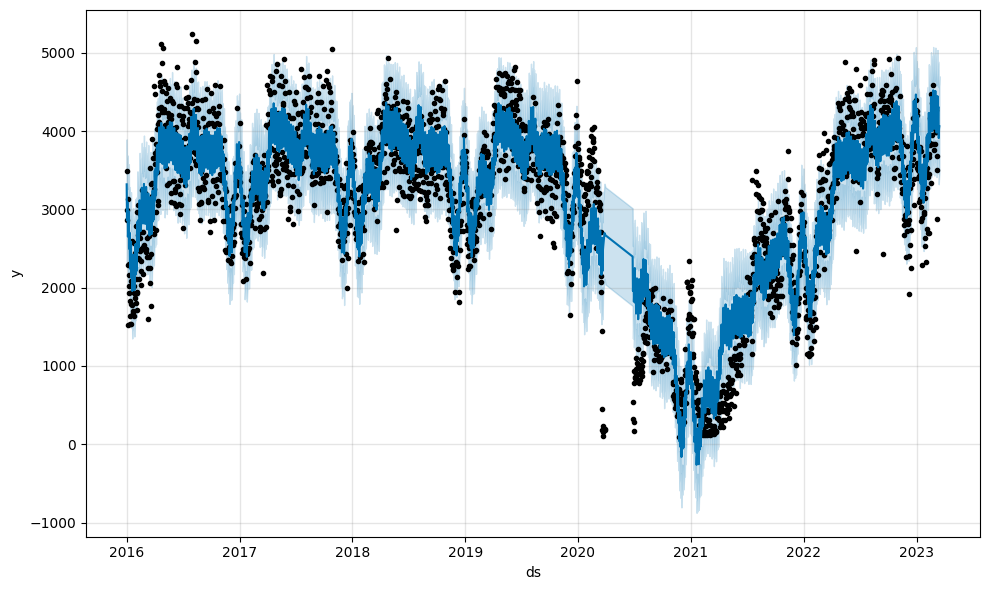

In [36]:
graph = baseline_model.plot(forecast_df)

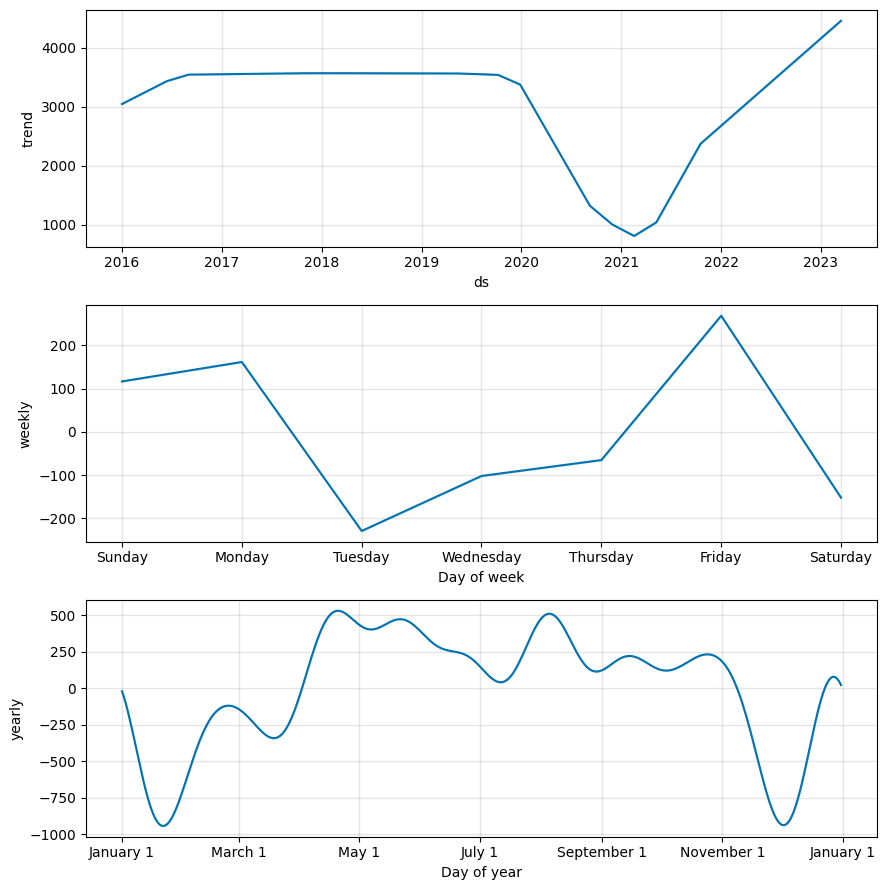

In [37]:
baseline_model.plot_components(forecast_df);

In [38]:
from prophet.diagnostics import cross_validation

In [39]:
eval_df = cross_validation(baseline_model, initial='366 days', period='90 days', horizon='90 days')

INFO:prophet:Making 25 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9i0wrui/8cf8039w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9i0wrui/l_jgr__8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52350', 'data', 'file=/tmp/tmpk9i0wrui/8cf8039w.json', 'init=/tmp/tmpk9i0wrui/l_jgr__8.json', 'output', 'file=/tmp/tmpk9i0wrui/prophet_modelobxwvsu7/prophet_model-20230602072156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9i0wrui/nmfnomv0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9i0wrui/2ed75adc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [40]:
eval_df

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-01-10,2454.337716,2045.410688,2895.839400,2449.0,2017-01-09
1,2017-01-11,2387.652357,1923.027021,2840.119803,2489.0,2017-01-09
2,2017-01-12,2638.854146,2173.777675,3086.951432,2084.0,2017-01-09
3,2017-01-13,2961.235043,2489.975380,3402.356834,3154.0,2017-01-09
4,2017-01-14,2362.082949,1947.196811,2799.046138,2397.0,2017-01-09
...,...,...,...,...,...,...
2152,2023-03-05,4884.894521,4251.827505,5473.370168,3987.0,2022-12-09
2153,2023-03-06,4917.780099,4298.033352,5512.535266,4273.0,2022-12-09
2154,2023-03-07,4515.201519,3931.533169,5146.068775,2871.0,2022-12-09
2155,2023-03-08,4638.255916,4001.937502,5202.094352,3509.0,2022-12-09


In [41]:
from prophet.diagnostics import performance_metrics

In [42]:
performance_metrics(eval_df)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,7.369396e+05,858.451870,570.203044,0.629813,0.126823,0.315525,0.595349
1,11 days,7.953603e+05,891.829768,595.333978,0.648458,0.131882,0.328573,0.588178
2,12 days,7.762457e+05,881.048087,589.959403,0.583536,0.125942,0.327449,0.601938
3,13 days,7.548675e+05,868.831124,580.693925,0.557227,0.120099,0.320603,0.620155
4,14 days,7.425526e+05,861.714910,580.941614,0.518357,0.122471,0.312851,0.620736
...,...,...,...,...,...,...,...,...
76,86 days,9.606862e+05,980.146022,709.149044,0.487050,0.162914,0.442973,0.505039
77,87 days,9.745153e+05,987.175404,713.217244,0.556234,0.162914,0.448148,0.509690
78,88 days,1.015147e+06,1007.545100,726.767806,0.652450,0.164462,0.457365,0.509109
79,89 days,1.096905e+06,1047.332345,752.356827,0.812627,0.164561,0.465510,0.504651


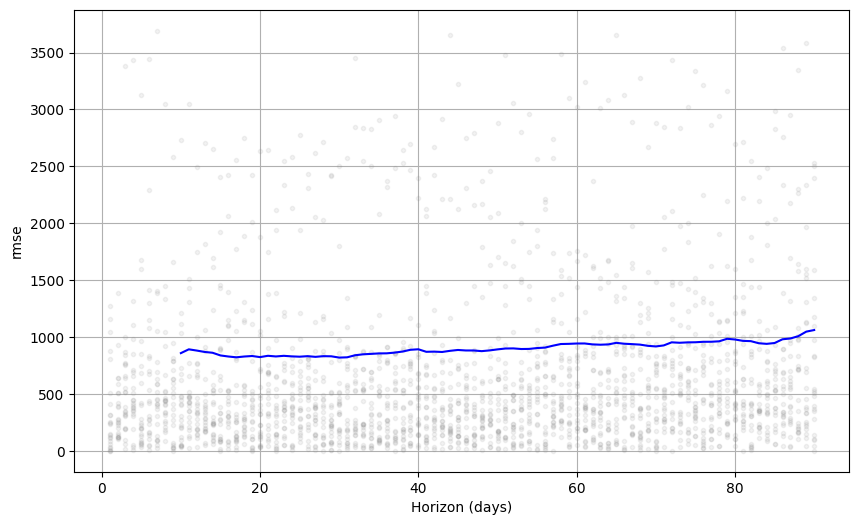

In [43]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(eval_df, metric='rmse');

In [48]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from mlforecast import MLForecast
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]

@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14, 21, 28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)


/usr/local/lib/python3.10/dist-packages/mlforecast/core.py:151: UserWarning:

The differences argument is deprecated and will be removed in a future version.
Please pass an `mlforecast.target_transforms.Differences` instance to the `target_transforms` argument instead.



In [49]:
nixtla_model = fcst.fit(generate_route_df(traffic_df, "LIS", "ORY").drop(columns=['paired_airport']),
                        id_col='home_airport', time_col='date', target_col='pax_total')

In [50]:
predict_df = nixtla_model.predict(7)
predict_df

,home_airport,date,LGBMRegressor,XGBRegressor,RandomForestRegressor
0,LIS,2023-03-10,3607.281254,3442.467285,3614.90
1,LIS,2023-03-11,3526.146172,3621.400635,3388.37
2,LIS,2023-03-12,3405.778923,3402.751465,3383.52
3,LIS,2023-03-13,3623.252189,3810.908691,3548.97
4,LIS,2023-03-14,3243.804640,3230.856445,3357.97
5,LIS,2023-03-15,3581.066672,3624.542725,3728.57
6,LIS,2023-03-16,3754.422380,3668.460449,3841.75


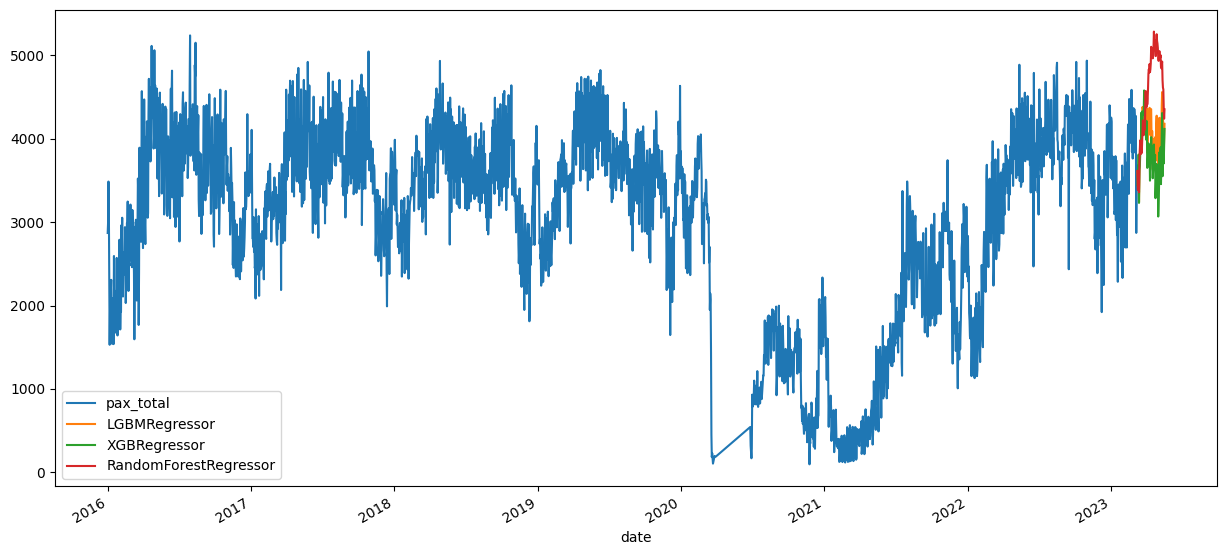

In [51]:
(pd.concat([generate_route_df(traffic_df, 'LIS', 'ORY').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [52]:
draw_ts_multiple((pd.concat([generate_route_df(traffic_df, 'LIS', 'ORY').drop(columns=['paired_airport']),
                             nixtla_model.predict(7*10)])),
                 v1='pax_total', v2='LGBMRegressor');

Streamlit


In [55]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=39f0a94855cfd85566ce2917baf5c77b8ce8e522bd6c115f36cd926083256ffc
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [56]:
import streamlit as st

# Streamlit app code
def main():
    # Set Streamlit app title
    st.title("My Streamlit App")
    
    # Add your content and functionality here
    st.write("Hello, Streamlit!")

if __name__ == '__main__':
    main()


2023-06-02 07:41:01.985 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]
